1. Here I use the premade modules to read in, clean input data,

2. Then, from  https://github.com/bukosabino/ta I use the ta library to get certain technical indicators required to generate trading signals for two trading strategies: the RSI and BB

3. Afterwards, I generate financial results of backtesting using a custom financial-evaluation module

## Contents

[0. Dependencies](#sec1)

[1. Data cleaning](#sec2)

[2. Technical Indicators \& Strategies](#sec3)

[3. Save Results](#sec4)

## 0. Dependencies
<a id = 'sec1'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time

import sys
sys.path.append('../utils/')
import data_cleaning 
import get_data
from visualize import ts_with_markers

from ta.momentum import rsi
from ta.volatility import bollinger_lband_indicator, bollinger_hband_indicator

## 1. Data cleaning
<a id = 'sec2'></a>

### Data related parameter settings


In [2]:
TestVarNames = []
assets= 'Testing'
path = "../data/data_raw/" + assets
VarName = "Adj Close"

datas_test = []

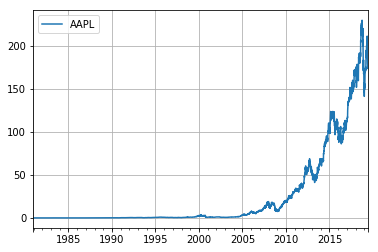

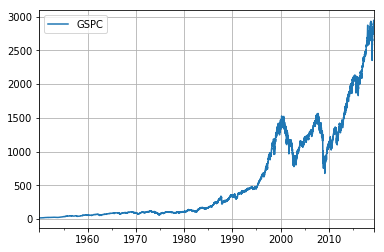

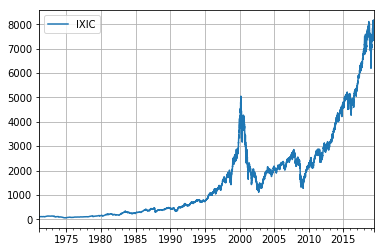

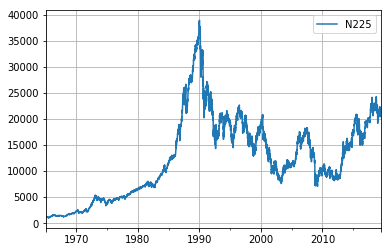

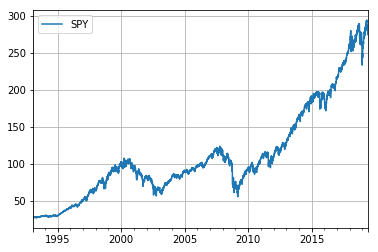

In [3]:
for name in os.listdir(path):
    df, num_missing = data_cleaning.create_cleaned_set(file_with_path = path + '/' + name,
                                                     varname = VarName,
                                                     datename = "Date",
                                                     weekdays = True,
                                                     fill_na_method = "ffill"
                                                    )
    TestVarNames.append(name)
    df.rename(columns={VarName: name[:-4]}, inplace = True)
    datas_test.append(df)
    
    df.plot(grid = True)

## Creating the 3 subsets corresponding to the 3 testing periods:

1. Test 1: 2005-12-05 to 2007-12-31
2. Test 2: 2007-12-04 to 2009-12-31
3. Test 3: 2017-05-04 to 2019-06-07

### Test 1

In [4]:
first_date_te1 = "2005-12-07"
last_date_te1 = "2007-12-31"
print("Date from " + str(first_date_te1) + " to " + last_date_te1)

Date from 2005-12-07 to 2007-12-31


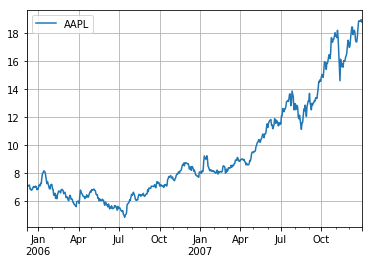

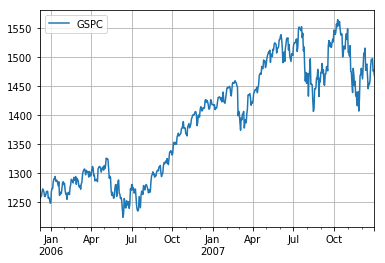

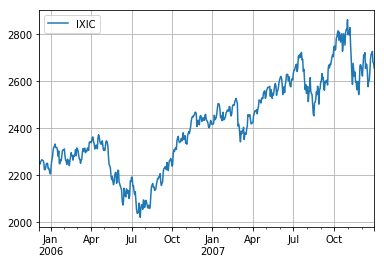

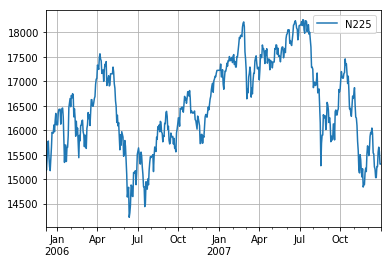

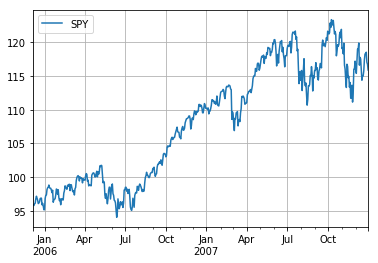

In [5]:
datas_test1 = []
for data in datas_test:
    datas_test1.append(data.loc[first_date_te1:last_date_te1])
    data.loc[first_date_te1:last_date_te1].plot(grid = True)

### Test 2

In [6]:
first_date_te2 = "2007-12-06"
last_date_te2 = "2009-12-31"

print("Date from " + str(first_date_te2) + " to " + last_date_te2)

Date from 2007-12-06 to 2009-12-31


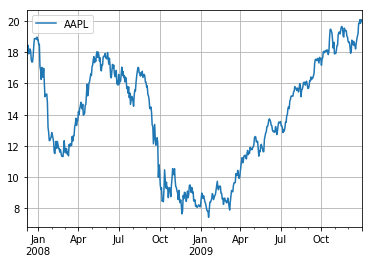

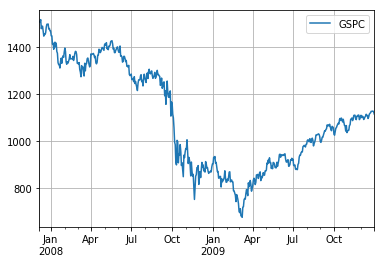

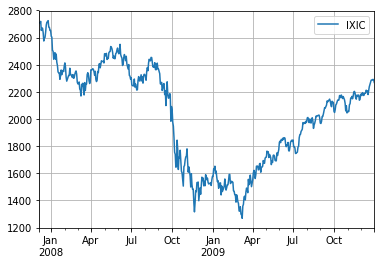

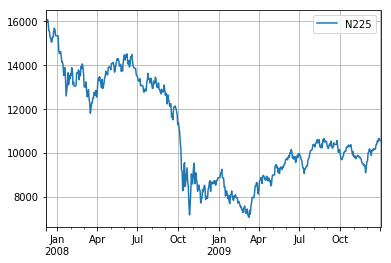

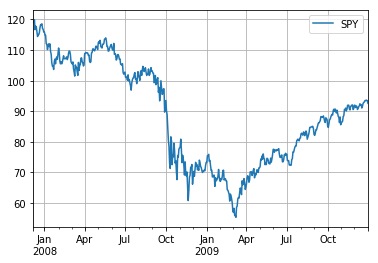

In [7]:
datas_test2 = []
for data in datas_test:
    datas_test2.append(data.loc[first_date_te2:last_date_te2])
    data.loc[first_date_te2:last_date_te2].plot(grid = True)

### Test 3

In [8]:
first_date_te3 = "2017-05-06"
last_date_te3 = "2019-06-07"
print("Date from " + str(first_date_te3) + " to " + last_date_te3)

Date from 2017-05-06 to 2019-06-07


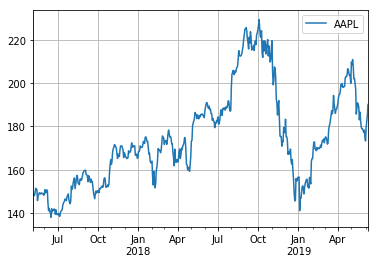

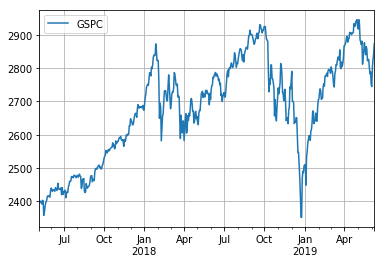

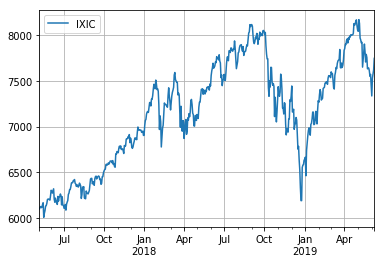

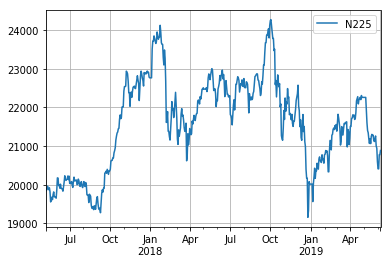

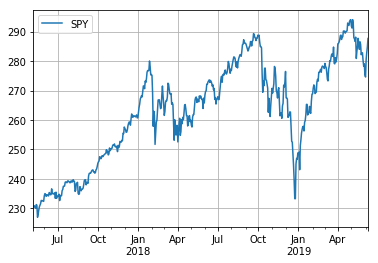

In [9]:
datas_test3 = []
for data in datas_test:
    datas_test3.append(data.loc[first_date_te3:last_date_te3])
    data.loc[first_date_te3:last_date_te3].plot(grid = True)

## 2. Technical Indicators and Startegies
<a id = 'sec3'></a>

### Adding RSI & Bollinger Band Indicators

#### Test 1

In [10]:
for idx, data in enumerate(datas_test1):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
        
    print(data.describe())


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  539.000000  519.000000         539.000000        539.000000
mean     9.354286   56.668727           0.074212          0.029685
std      3.624268   15.060958           0.262358          0.169873
min      4.808185   24.905546           0.000000          0.000000
25%      6.633909   44.770297           0.000000          0.000000
50%      8.101892   56.535946           0.000000          0.000000
75%     11.603411   69.271793           0.000000          0.000000
max     18.962296   89.519601           1.000000          1.000000
              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   539.000000  519.000000         539.000000        539.000000
mean   1389.258962   55.206574           0.046382          0.033395
std      97.334543   12.240613           0.210507          0.179833
min    1223.689941   19.951101           0.000000          0.000000
25%    1290.695007   46.737599           0.000000        

#### Test 2

In [11]:
for idx, data in enumerate(datas_test2):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
        
    print(data.describe())


             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  541.000000  521.000000         541.000000        541.000000
mean    13.845001   53.109498           0.057301          0.040665
std      3.559157   16.008025           0.232633          0.197697
min      7.420563   10.918138           0.000000          0.000000
25%     11.006539   41.131403           0.000000          0.000000
50%     14.023161   53.481364           0.000000          0.000000
75%     16.908831   65.874980           0.000000          0.000000
max     20.082972   86.822604           1.000000          1.000000


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   541.000000  521.000000         541.000000        541.000000
mean   1097.713992   50.014023           0.025878          0.055453
std     217.460450   12.889049           0.158918          0.229074
min     676.530029   19.493099           0.000000          0.000000
25%     903.250000   41.156696           0.000000          0.000000
50%    1068.300049   50.488619           0.000000          0.000000
75%    1315.219971   59.802432           0.000000          0.000000
max    1515.959961   81.266738           1.000000          1.000000
              IXIC         RSI  bb_high_indicator  bb_low_indicator
count   541.000000  521.000000         541.000000        541.000000
mean   2025.718100   51.129667           0.035120          0.051756
std     362.758587   13.429784           0.184254          0.221739
min    1268.640015   16.707175           0.000000          0.000000
25%    1689.209961   41.511889           0.00000

#### Test 3

In [12]:
for idx, data in enumerate(datas_test3):
    name = TestVarNames[idx][:-4]
    ## Add RSI
    data['RSI'] = rsi(data[name], n = 20, fillna = False)
    
    # Add bollinger band high indicator filling NaN values
    data['bb_high_indicator'] = bollinger_hband_indicator(data[name], n=20, ndev=2, fillna=False)

    # Add bollinger band low indicator filling NaN values
    data['bb_low_indicator'] = bollinger_lband_indicator(data[name], n=20, ndev=2, fillna=False)
    
    
    print(data.describe())


             AAPL         RSI  bb_high_indicator  bb_low_indicator
count  545.000000  525.000000         545.000000        545.000000
mean   174.738061   54.442416           0.078899          0.056881
std     22.174895   15.784149           0.269829          0.231827
min    137.991791   15.120947           0.000000          0.000000
25%    155.898438   41.351123           0.000000          0.000000
50%    171.016678   55.425220           0.000000          0.000000
75%    187.840683   66.975397           0.000000          0.000000
max    229.392090   89.010924           1.000000          1.000000


C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

              GSPC         RSI  bb_high_indicator  bb_low_indicator
count   545.000000  525.000000         545.000000        545.000000
mean   2678.969783   57.188770           0.053211          0.044037
std     153.060483   14.428655           0.224660          0.205365
min    2351.100098   12.053339           0.000000          0.000000
25%    2562.100098   46.697270           0.000000          0.000000
50%    2703.959961   59.412461           0.000000          0.000000
75%    2798.429932   67.746372           0.000000          0.000000
max    2945.830078   89.189644           1.000000          1.000000
              IXIC         RSI  bb_high_indicator  bb_low_indicator
count   545.000000  525.000000         545.000000        545.000000
mean   7150.880986   56.449837           0.060550          0.038532
std     579.642922   13.891859           0.238723          0.192654
min    6011.240234   13.660406           0.000000          0.000000
25%    6698.959961   46.174306           0.00000

### Add Buy-Sell Signals

#### Test 1

In [13]:
for data in datas_test1:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    #print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/p

#### Test 2

In [14]:
for data in datas_test2:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    #print(data.tail(50))
    
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

#### Test 3

In [15]:
for data in datas_test3:
    data["RSI_Signals"] = "NaN"
    data["BB_Signals"] = "Hold"
    
    # Generating Signals for RSI
    for idx, RSI in enumerate(data["RSI"][1:]):        
        if ((RSI > 30) & (RSI < 70)):
            # If crossed the 30-line from below
            if data["RSI"][idx] <= 30:
                data["RSI_Signals"].iloc[idx+1] = "Buy"
            # If crossed 70 line from above
            elif data["RSI"][idx] >= 70:
                data["RSI_Signals"].iloc[idx+1] = "Sell"
            else:
                data["RSI_Signals"].iloc[idx+1] = "Hold"
        else:
            data["RSI_Signals"].iloc[idx+1] = "Hold"
    
    data['BB_Signals'].loc[data["bb_high_indicator"]==1] = "Sell"
    data['BB_Signals'].loc[data["bb_low_indicator"]==1] = "Buy"
    
    #print(data.tail(50))
    

C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Corvinus\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

## Save Results

### Test 1

In [16]:
path = "../data/competing-strategies-signals/test1"

In [17]:
for idx, data in enumerate(datas_test1):
    name = TestVarNames[idx][:-4]
    data.dropna()[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test1_" + name + "_competing_signals.csv")

### Test 2

In [18]:
path = "../data/competing-strategies-signals/test2"

In [19]:
for idx, data in enumerate(datas_test2):
    name = TestVarNames[idx][:-4]
    data.dropna()[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test2_" + name + "_competing_signals.csv")

### Test 3

In [20]:
path = "../data/competing-strategies-signals/test3"

In [21]:
for idx, data in enumerate(datas_test3):
    name = TestVarNames[idx][:-4]
    data.dropna()[[name, "RSI_Signals", "BB_Signals"]].to_csv(path + "/test3_" + name + "_competing_signals.csv")